## Importing Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import pickle

## Loading Data

In [2]:
df = pd.read_csv("data/salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,agile_yn,numpy_yn,excel_yn,aws_yn,pandas_yn,ml_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,1,0,0,1,data scientist,na,2536,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,1,data scientist,na,4783,1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,1,0,0,1,data scientist,na,3461,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,1,data scientist,na,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,1,0,0,1,data scientist,na,2728,3


## Actions to be applied to the dataset.

#### 1- Choose Relevent Columns
#### 2- Get Dummy Data
#### 3- Train-Test Split
#### 4- Multiple Linear Regression
#### 5- Lasso Regression
#### 6- Random Forest
#### 7- Tune Models GridSearchCV
#### 8- Test Ensembles

-----------------------

### 1- Choose Relevent Columns

In [3]:
# Retrieving the column names of the DataFrame.
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn', 'ml_yn',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [4]:
# Creating a new DataFrame, df_model, by selecting specific columns from the original DataFrame.
df_model = df[["avg_salary",'Rating','Size','Type of ownership','Industry', 'Sector','Revenue','num_comp','hourly', 'employer_provided',
             'job_state', 'same_state','age', 'python_yn','agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn',
             'ml_yn','job_simp', 'seniority','desc_len']]

In [5]:
df_model.shape

(742, 23)

### 2- Get Dummy Data

In [6]:
# Creating dummy variables for categorical columns in the DataFrame.
df_dum = pd.get_dummies(df_model)
df_dum.shape

(742, 181)

In [7]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,agile_yn,numpy_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,1,0,0,0,50,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,1,0,0,0,39,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,1,0,0,1,13,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,58,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,25,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### 3- Train-Test Split

In [50]:
# Separating the features (X) and the target variable (y) from the DataFrame.
X = df_dum.drop("avg_salary",axis=1) # Features (input variables)
y = df_dum["avg_salary"] # Features (input variables)

In [51]:
# Splitting the dataset into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [52]:
print(X_train.shape)
print(y_train.shape)

(593, 180)
(593,)


### 4- Multiple Linear Regression

In [111]:
# Adding a constant column to the feature matrix for OLS regression.
X_sm = sm.add_constant(X)

# Creating an OLS regression model.
model = sm.OLS(y,X_sm)

# Fitting the OLS model and obtaining the summary statistics.
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     10.88
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.53e-100
Time:                        14:56:45   Log-Likelihood:                -3287.9
No. Observations:                 742   AIC:                             6868.
Df Residuals:                     596   BIC:                             7541.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6706      6.606      6.611      0.000      30.697      56.645
Rating                                                3.1209      1.890      1.652      0.099      -0.590       6.832
num_comp                                              3.7415      1.273      2.940      0.003       1.242       6.241
hourly                                              -39.6617      8.927     -4.443      0.000     -57.195     -22.129
employer_provided                                    24.4076     11.384      2.144      0.032       2.050      46.765
same_state                                            1.6829      2.555      0.659      0.510      -3.335       6.701
age                                                   0.0273      0.029      0.934      0.350      -0.030       0.085
python_yn                                             5.6038      2.507      2.235      0.026       0.680      10.528
agile_yn                                            -14.2893      2.724     -5.246      0.000     -19.639      -8.940
numpy_yn                                            -13.2026      7.291     -1.811      0.071     -27.523       1.117
excel_yn                                             -0.7320      2.205     -0.332      0.740      -5.062       3.598
aws_yn                                                2.1989      2.632      0.835      0.404      -2.970       7.368
pandas_yn                                            15.6377      6.020      2.598      0.010       3.816      27.460
ml_yn                                                 7.4678      2.705      2.761      0.006       2.155      12.781
desc_len                                              0.0002      0.001      0.219      0.827      -0.001       0.002
Size_-1                                              15.4771      8.391      1.845      0.066      -1.002      31.956
Size_1 to 50 employees                                2.2817      6.321      0.361      0.718     -10.133      14.696
Size_10000+ employees                                -4.2251      5.687     -0.743      0.458     -15.395       6.944
Size_1001 to 5000 employees                           4.6399      3.773      1.230      0.219      -2.769      12.049
Size_201 to 500 employees                             0.5317      3.774      0.141      0.888      -6.881       7.944
Size_5001 to 10000 employees                         -3.6111      5.305     -0.681      0.496     -14.029       6.807
Size_501 to 1000 employees                           -0.1724      3.971     -0.043      0.965      -7.972       7.627
Size_51 to 200 employees                              3.0809      4.333      0.711      0.477      -5.428      11.590
Size_Unknown   

In [74]:
# Creating an instance of the LinearRegression class.
lr = LinearRegression()

# Fitting the linear regression model on the training data.
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
# Calculating the R^2 score of the linear regression model on the training data.
lr.score(X_train,y_train)

0.7340402156936139

In [76]:
# Performing cross-validation on the linear regression model using the training data.
np.mean(cross_val_score(lr,X_train,y_train,scoring="neg_mean_absolute_error",cv = 3))

-20.80610986107993

### 5- Lasso Regression

In [106]:
# Creating an instance of the Lasso regression model with alpha=0.13.
lr_l = Lasso(alpha=0.13)

# Fitting the Lasso regression model on the training data.
lr_l.fit(X_train,y_train)

Lasso(alpha=0.13)

In [58]:
# Performing cross-validation on the Lasso regression model using the training data.
np.mean(cross_val_score(lr_l,X_train,y_train,scoring="neg_mean_absolute_error",cv = 3))

-20.883830083820946

C:\Users\mohammad\anaconda3\envs\machine_learning_practice\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+03, tolerance: 5.722e+01
  model = cd_fast.enet_coordinate_descent(


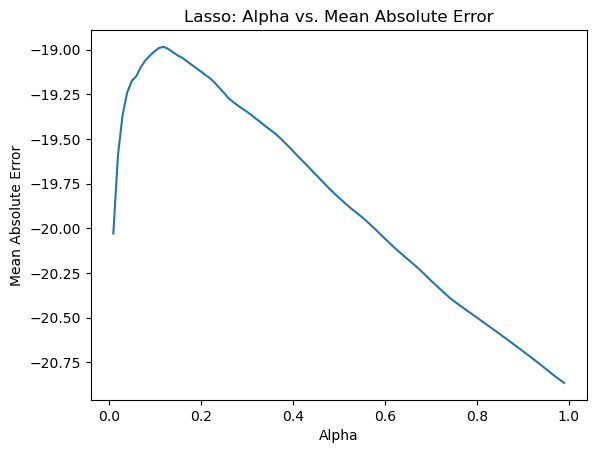

In [72]:
# Initializing empty lists to store alpha values and corresponding mean absolute error.
error = []
alpha = []

# Looping over a range of alpha values from 0.01 to 1.00.
for i in range(1,100):
    # Appending the alpha value to the list.
    alpha.append(i/100)
    # Creating a Lasso regression model with the current alpha value.
    lrl = Lasso(alpha=(i/100))
    # Performing cross-validation and calculating the mean absolute error.
    error.append(np.mean(cross_val_score(lrl,X_train,y_train,scoring="neg_mean_absolute_error",cv = 3)))
        

# Plotting the alpha values against the mean absolute error.        
plt.plot(alpha, error)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso: Alpha vs. Mean Absolute Error')
plt.show()

In [73]:
# Creating a tuple of paired elements from alpha and error lists.
err = tuple(zip(alpha,error))

# Creating a DataFrame from the tuple with columns "alpha" and "error".
df_err = pd.DataFrame(err,columns=["alpha","error"])

# Selecting the row(s) with the maximum error value.
df_err[df_err.error == max(df_err.error)]

,alpha,error
11,0.12,-18.985531


### 6- Random Forest

In [78]:
# Creating an instance of the RandomForestRegressor class.
rf = RandomForestRegressor()

In [80]:
# Performing cross-validation on the random forest regressor model using the training data.
np.mean(cross_val_score(rf,X_train,y_train,scoring="neg_mean_absolute_error",cv = 3))

-14.808305944384626

### 7- Tune Models GridSearchCV

In [101]:
# Defining a dictionary of hyperparameters for tuning the random forest regressor model.
parameters = {
    "n_estimators": range(10, 300, 10), # Number of trees in the random forest
    "criterion": ["squared_error", "absolute_error"], # Splitting criterion for tree construction
    "max_features": [1.0, "sqrt", "log2"] # Maximum number of features to consider for each split
}

In [102]:
# Creating an instance of GridSearchCV for hyperparameter tuning.
gs = GridSearchCV(rf,parameters,scoring="neg_mean_absolute_error",cv = 3)

In [103]:
# Fitting the GridSearchCV object on the training data to perform grid search.
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [104]:
# Accessing the best mean absolute error score obtained during grid search.
gs.best_score_

-14.652674374882496

In [115]:
# Accessing the best estimator model obtained during grid search.
rf_model = gs.best_estimator_
rf_model

RandomForestRegressor(criterion='absolute_error', n_estimators=160)

In [108]:
# Making predictions on the test data using different models.

tpred_lr = lr.predict(X_test) # Linear regression model predictions
tpred_lr_l = lr_l.predict(X_test) # Lasso regression model predictions
tpred_rf = gs.best_estimator_.predict(X_test) # Random forest regressor model predictions

In [112]:
# Calculating and printing the mean absolute error for each model's predictions.
mae_lr = mean_absolute_error(y_test, tpred_lr)        # MAE for linear regression
mae_lr_l = mean_absolute_error(y_test, tpred_lr_l)    # MAE for Lasso regression
mae_rf = mean_absolute_error(y_test, tpred_rf)        # MAE for random forest regressor

print("The Mean Absolute Error of linear Regression is: ", mae_lr)
print("The Mean Absolute Error of linear Lasso is: ", mae_lr_l)
print("The Mean Absolute Error of Random Forest is: ", mae_rf)


The Mean Absolute Error of linear Regression is:  18.291737396737968
The Mean Absolute Error of linear Lasso is:  19.55419574389198
The Mean Absolute Error of Random Forest is:  10.496245805369128


In [116]:
# Load the model from the file
with open('models/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)